# Week 4 Exercise 2: Create Morbidity Risk Scores
- One overall score for morbidity risk
- One score for diabetes risk
- One score for hypertension risk

In [1]:
import pandas as pd

In [2]:
df_patient = pd.read_csv('w3e1_patient_dataset.csv')
df_patient = df_patient.set_index('id')

In [3]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22632 entries, 53e40e98-c764-53a4-aaf6-6318a3c3c95d to 9fdfb702-0f46-8899-fe8c-363733532bb6
Data columns (total 90 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   first                                      22632 non-null  object 
 1   last                                       22632 non-null  object 
 2   city                                       22632 non-null  object 
 3   state                                      22632 non-null  object 
 4   county                                     22632 non-null  object 
 5   fips                                       22632 non-null  int64  
 6   lat                                        22632 non-null  float64
 7   lon                                        22632 non-null  float64
 8   birthdate                                  22632 non-null  object 
 9   marital                          

In [4]:
df_county = pd.read_csv('w2e4_county_dataset.csv')
df_county = df_county.set_index('fips')

In [5]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 13001 to 13321
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state_abbr                    159 non-null    object 
 1   county_name                   159 non-null    object 
 2   ahrf_pop_est_2020             159 non-null    float64
 3   ahrf_pop_den_2010             159 non-null    float64
 4   ahrf_phys_pricare             159 non-null    float64
 5   ahrf_phys_total               159 non-null    float64
 6   ahrf_hosp_total               159 non-null    float64
 7   ahrf_hosp_cah                 159 non-null    float64
 8   ahrf_hosp_with_ed             159 non-null    float64
 9   ahrf_hosp_with_offcampus_ed   159 non-null    float64
 10  ahrf_hosp_with_pedsed         159 non-null    float64
 11  ahrf_hosp_with_traumactr      159 non-null    float64
 12  ahrf_ed_visits                159 non-null    float64
 13 

In [6]:
df = pd.merge(df_patient, df_county, how='left', left_on = 'fips', right_index=True)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 22632 entries, 53e40e98-c764-53a4-aaf6-6318a3c3c95d to 9fdfb702-0f46-8899-fe8c-363733532bb6
Data columns (total 128 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    first                                      object 
 1    last                                       object 
 2    city                                       object 
 3    state                                      object 
 4    county                                     object 
 5    fips                                       int64  
 6    lat                                        float64
 7    lon                                        float64
 8    birthdate                                  object 
 9    marital                                    object 
 10   race                                       object 
 11   ethnicity                                  object 
 12   gender                   

# Overall Morbidity Risk score

## Preprocessing (setup the data)

In [8]:
# Divide the dataset into labels (y) and samples/predictors (X)

# Target: y = split of 'cond_total_dayssince' at the 75th percentile
y = (df['cond_total_dayssince'] > df['cond_total_dayssince'].quantile(0.75)).astype('int')

In [9]:
# What does y look like?
y

id
53e40e98-c764-53a4-aaf6-6318a3c3c95d    0
c87850c0-6c2e-7312-b050-cfcc2a74be53    1
0c99afa9-03c2-f695-efe2-7943262bbbc7    0
5e8c9aa2-90da-8e27-7d6f-c6b0faf50169    0
ce8b6d28-f7a3-8427-6ca6-0f01fc5422d4    0
                                       ..
9e386110-9e48-346c-7363-86669d6cfa8d    0
f2ad9924-0e5e-4ed4-a600-bc4341c440b6    0
b3882e05-5ad3-36d9-8822-d5ff0fe187bb    1
69426d6b-5c07-b1b7-41fc-060a788819c8    1
9fdfb702-0f46-8899-fe8c-363733532bb6    1
Name: cond_total_dayssince, Length: 22632, dtype: int32

In [10]:
# Features: X = numeric features (categorical in next cell)
X = df[['age', 'numof_med_conds', 'numof_soc_challs', 'comm_health_needs_score']]

In [11]:
# X: Add categorical columns as dummies (one hot encode)
list_cateogrical_cols = ['gender', 'race', 'ethnicity', 'insurancetype', 'education', 'marital']

for colname in list_cateogrical_cols:
    df_dummies = pd.get_dummies(df[colname], prefix=colname)
    X = pd.concat([X, df_dummies], axis=1)

In [12]:
# What does X look like?
X

,age,numof_med_conds,numof_soc_challs,comm_health_needs_score,gender_F,gender_M,race_asian,race_black,race_hawaiian,race_native,...,insurancetype_noins,education_high_sch_equiv,education_post_sec,education_pri_only,education_unknown,marital_D,marital_M,marital_S,marital_W,marital_unknown
id,,,,,,,,,,,,,,,,,,,,,
53e40e98-c764-53a4-aaf6-6318a3c3c95d,5,1,0,2.42,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
c87850c0-6c2e-7312-b050-cfcc2a74be53,74,20,3,-6.31,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
0c99afa9-03c2-f695-efe2-7943262bbbc7,31,2,0,-5.43,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
5e8c9aa2-90da-8e27-7d6f-c6b0faf50169,42,9,2,-2.25,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
ce8b6d28-f7a3-8427-6ca6-0f01fc5422d4,9,0,0,-0.82,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e386110-9e48-346c-7363-86669d6cfa8d,47,4,2,-5.96,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
f2ad9924-0e5e-4ed4-a600-bc4341c440b6,47,6,3,-5.59,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
b3882e05-5ad3-36d9-8822-d5ff0fe187bb,60,13,4,-5.59,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


## sklearn: Split

In [13]:
# Split into test and train for both X (predictors) and y (targets/labels)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [14]:
# What do each of these dataframes look like?
print('Training Features (X_train) Shape:', X_train.shape)
print('Training Labels (y_train) Shape:', y_train.shape)
print('Testing Features (X_test) Shape:', X_test.shape)
print('Testing Labels (y_test) Shape:', y_test.shape)

Training Features (X_train) Shape: (16974, 28)
Training Labels (y_train) Shape: (16974,)
Testing Features (X_test) Shape: (5658, 28)
Testing Labels (y_test) Shape: (5658,)


## sklearn: Fit and Score

In [15]:
# Run a number of models and check accuracy
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=30),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=0, solver='liblinear', max_iter=500)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print('Accuracy of {0}: {1}'.format(name, model.score(X_test, y_test)))

Accuracy of LinearRegression: 0.6144651867030093
Accuracy of DecisionTreeClassifier: 0.8829975256274302
Accuracy of RandomForestClassifier: 0.9153411099328385
Accuracy of LogisticRegression: 0.9185224460940261


## sklearn: Predict

In [16]:
# Get the probabilities for both classes: 0 in col 1, and 1 in col 1
result = model.predict_proba(X)
df['risk_score_morbidity'] = result[:,1] # only need probability for 1 (column 2, but zero indexed)

# Round and rescale to be percentage 
# And deal with float rounding issues by * 10000, converting to int, and dividing by 100
df['risk_score_morbidity'] = (df['risk_score_morbidity'] * 10000).astype(int) 
df['risk_score_morbidity'] = df['risk_score_morbidity'].astype(float)/100

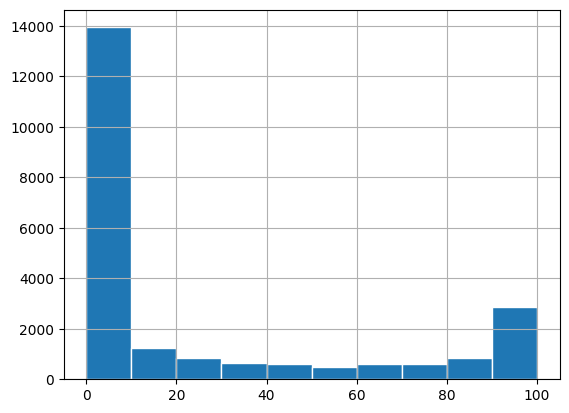

In [17]:
import matplotlib.pyplot as plt
df['risk_score_morbidity'].hist(edgecolor='white')
plt.show()

# Specific Condition Risk Scores: Diabetes, Hypertension

## Start with imputing

In [18]:
df_impute = df[['age', 'comm_health_needs_score', 'numof_medications', 'numof_soc_challs', 'obs_bmi_most_recent', 'cond_diab_start_dayssince', 'obs_hba1c_most_recent', 'cond_hyp_start_dayssince', 'obs_bp_dia_most_recent', 'obs_bp_sys_most_recent']]

In [19]:
# Deal with missing data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")
Ximputed = pd.DataFrame(imputer.fit_transform(df_impute), columns = df_impute.columns)

In [20]:
# Because the imputer returns an array (no index), need to get the index and create a dataframe that includes the index
Ximputed['id'] = df.index
Ximputed = Ximputed.set_index('id')

## Diabetes

In [21]:
y = df['cond_diab']

In [22]:
# Imputed columns most relevant to diabetes
X = Ximputed[['cond_diab_start_dayssince', 'obs_bmi_most_recent', 'obs_hba1c_most_recent']]

# Non-imputed columns relevant to diabetes
#X = pd.concat([X, df['numof_med_conds']], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [24]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=30),
    'LogisticRegression': LogisticRegression(random_state=0, solver='liblinear', max_iter=500),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print('Accuracy of {0}: {1}'.format(name, model.score(X_test, y_test)))

Accuracy of LinearRegression: 0.3310869068425115
Accuracy of DecisionTreeClassifier: 0.8480028278543655
Accuracy of LogisticRegression: 0.736656062212796
Accuracy of RandomForestClassifier: 0.8548957228702722


In [25]:
# Get the probabilities for both classes: 0 in col 1, and 1 in col 1
result = model.predict_proba(X)
df['risk_score_diab'] = result[:,1] # only need probability for 1 (column 2, but zero indexed)

# Round and rescale to be percentage 
# And deal with float rounding issues by * 10000, converting to int, and dividing by 100
df['risk_score_diab'] = (df['risk_score_diab'] * 10000).astype(int) 
df['risk_score_diab'] = df['risk_score_diab'].astype(float)/100

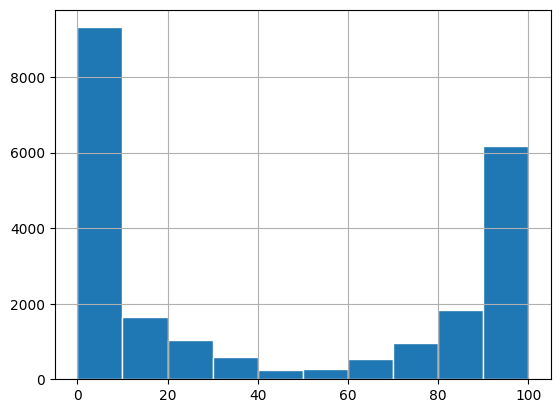

In [26]:
import matplotlib.pyplot as plt
df['risk_score_diab'].hist(edgecolor='white')
plt.show()

### Hypertension

In [27]:
y = df['cond_hyp']

In [28]:
# Imputed columns most relevant to hypertension
X = Ximputed[['cond_hyp_start_dayssince', 'obs_bmi_most_recent', 'obs_bp_dia_most_recent', 'obs_bp_sys_most_recent']]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [30]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=30),
    'LogisticRegression': LogisticRegression(random_state=0, solver='liblinear', max_iter=500),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print('Accuracy of {0}: {1}'.format(name, model.score(X_test, y_test)))

Accuracy of LinearRegression: 0.28204042714637967
Accuracy of DecisionTreeClassifier: 0.7087310003534818
Accuracy of LogisticRegression: 0.7364793213149523
Accuracy of RandomForestClassifier: 0.7587486744432662


In [31]:
# Get the probabilities for both classes: 0 in col 1, and 1 in col 1
result = model.predict_proba(X)
df['risk_score_hyp'] = result[:,1] # only need probability for 1 (column 2, but zero indexed)

# Round and rescale to be percentage 
# And deal with float rounding issues by * 10000, converting to int, and dividing by 100
df['risk_score_hyp'] = (df['risk_score_hyp'] * 10000).astype(int) 
df['risk_score_hyp'] = df['risk_score_hyp'].astype(float)/100

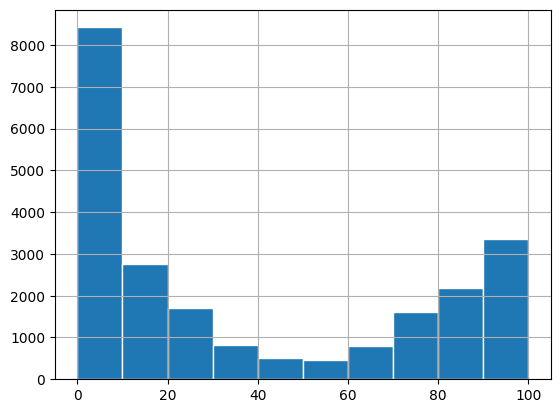

In [32]:
import matplotlib.pyplot as plt
df['risk_score_hyp'].hist(edgecolor='white')
plt.show()

# Generate Output File

In [33]:
df.to_csv('w4e2_patient_risk_morb_scores.csv')

In [34]:
df.to_excel('w4e2_patient_risk_morb_scores.xlsx')